In [19]:
import numpy as np
import pandas as pd
import seaborn as sns

In [20]:
date = pd.read_csv('orders.csv')
time = pd.read_csv('messages.csv')

In [21]:
date.head()

,date,product_id,city_id,orders
0,2019-12-10,5628,25,3
1,2018-08-15,3646,14,157
2,2018-10-23,1859,25,1
3,2019-08-17,7292,25,1
4,2019-01-06,4344,25,3


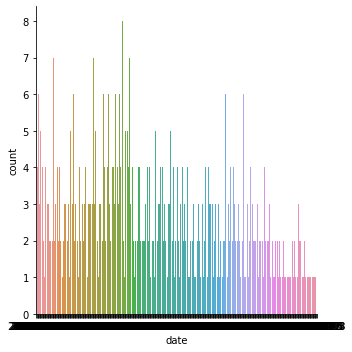

In [23]:

sns.catplot(x='date',data=date,kind='count')

In [24]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        1000 non-null   object
 1   product_id  1000 non-null   int64 
 2   city_id     1000 non-null   int64 
 3   orders      1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [25]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1000 non-null   object
 1   msg     1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


# Working with Dates

In [26]:
# Converting to datetime datatype
date['date'] = pd.to_datetime(date['date'])

In [27]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1000 non-null   datetime64[ns]
 1   product_id  1000 non-null   int64         
 2   city_id     1000 non-null   int64         
 3   orders      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 31.4 KB


#### 1. Extract year

In [28]:
date['date_year'] = date['date'].dt.year

date.sample(5)

,date,product_id,city_id,orders,date_year
784,2019-11-07,3076,18,11,2019
725,2018-08-08,7556,7,5,2018
33,2019-07-11,3121,17,1,2019
532,2019-10-17,3250,27,3,2019
251,2018-11-14,7239,22,1,2018


#### 2. Extract Month

In [29]:
date['date_month_no'] = date['date'].dt.month

date.head()

,date,product_id,city_id,orders,date_year,date_month_no
0,2019-12-10,5628,25,3,2019,12
1,2018-08-15,3646,14,157,2018,8
2,2018-10-23,1859,25,1,2018,10
3,2019-08-17,7292,25,1,2019,8
4,2019-01-06,4344,25,3,2019,1


In [30]:
date['date_month_name'] = date['date'].dt.month_name()

date.head()

,date,product_id,city_id,orders,date_year,date_month_no,date_month_name
0,2019-12-10,5628,25,3,2019,12,December
1,2018-08-15,3646,14,157,2018,8,August
2,2018-10-23,1859,25,1,2018,10,October
3,2019-08-17,7292,25,1,2019,8,August
4,2019-01-06,4344,25,3,2019,1,January


#### Extract Days

In [31]:
date['date_day'] = date['date'].dt.day

date.head()

,date,product_id,city_id,orders,date_year,date_month_no,date_month_name,date_day
0,2019-12-10,5628,25,3,2019,12,December,10
1,2018-08-15,3646,14,157,2018,8,August,15
2,2018-10-23,1859,25,1,2018,10,October,23
3,2019-08-17,7292,25,1,2019,8,August,17
4,2019-01-06,4344,25,3,2019,1,January,6


In [32]:
# day of week
date['date_dow'] = date['date'].dt.dayofweek

date.head()


,date,product_id,city_id,orders,date_year,date_month_no,date_month_name,date_day,date_dow
0,2019-12-10,5628,25,3,2019,12,December,10,1
1,2018-08-15,3646,14,157,2018,8,August,15,2
2,2018-10-23,1859,25,1,2018,10,October,23,1
3,2019-08-17,7292,25,1,2019,8,August,17,5
4,2019-01-06,4344,25,3,2019,1,January,6,6


In [33]:
# day of week - name

date['date_dow_name'] = date['date'].dt.day_name()

date.drop(columns=['product_id','city_id','orders']).head()

,date,date_year,date_month_no,date_month_name,date_day,date_dow,date_dow_name
0,2019-12-10,2019,12,December,10,1,Tuesday
1,2018-08-15,2018,8,August,15,2,Wednesday
2,2018-10-23,2018,10,October,23,1,Tuesday
3,2019-08-17,2019,8,August,17,5,Saturday
4,2019-01-06,2019,1,January,6,6,Sunday


In [34]:
# is weekend?

date['date_is_weekend'] = np.where(date['date_dow_name'].isin(['Sunday', 'Saturday']), 1,0)

date.drop(columns=['product_id','city_id','orders']).head()

,date,date_year,date_month_no,date_month_name,date_day,date_dow,date_dow_name,date_is_weekend
0,2019-12-10,2019,12,December,10,1,Tuesday,0
1,2018-08-15,2018,8,August,15,2,Wednesday,0
2,2018-10-23,2018,10,October,23,1,Tuesday,0
3,2019-08-17,2019,8,August,17,5,Saturday,1
4,2019-01-06,2019,1,January,6,6,Sunday,1


#### Extract week of the year

In [35]:
date['date_week'] = date['date'].dt.week

date.drop(columns=['product_id','city_id','orders']).head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7036\1798805728.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  date['date_week'] = date['date'].dt.week


,date,date_year,date_month_no,date_month_name,date_day,date_dow,date_dow_name,date_is_weekend,date_week
0,2019-12-10,2019,12,December,10,1,Tuesday,0,50
1,2018-08-15,2018,8,August,15,2,Wednesday,0,33
2,2018-10-23,2018,10,October,23,1,Tuesday,0,43
3,2019-08-17,2019,8,August,17,5,Saturday,1,33
4,2019-01-06,2019,1,January,6,6,Sunday,1,1


#### Extract Quarter

In [36]:
date['quarter'] = date['date'].dt.quarter

date.drop(columns=['product_id','city_id','orders']).head()

,date,date_year,date_month_no,date_month_name,date_day,date_dow,date_dow_name,date_is_weekend,date_week,quarter
0,2019-12-10,2019,12,December,10,1,Tuesday,0,50,4
1,2018-08-15,2018,8,August,15,2,Wednesday,0,33,3
2,2018-10-23,2018,10,October,23,1,Tuesday,0,43,4
3,2019-08-17,2019,8,August,17,5,Saturday,1,33,3
4,2019-01-06,2019,1,January,6,6,Sunday,1,1,1


#### Extract Semester

In [37]:
date['semester'] = np.where(date['quarter'].isin([1,2]), 1, 2)

date.drop(columns=['product_id','city_id','orders']).head()

,date,date_year,date_month_no,date_month_name,date_day,date_dow,date_dow_name,date_is_weekend,date_week,quarter,semester
0,2019-12-10,2019,12,December,10,1,Tuesday,0,50,4,2
1,2018-08-15,2018,8,August,15,2,Wednesday,0,33,3,2
2,2018-10-23,2018,10,October,23,1,Tuesday,0,43,4,2
3,2019-08-17,2019,8,August,17,5,Saturday,1,33,3,2
4,2019-01-06,2019,1,January,6,6,Sunday,1,1,1,1


#### Extract Time elapsed between dates

In [38]:
import datetime

today = datetime.datetime.today()

today

datetime.datetime(2023, 9, 6, 22, 12, 22, 338898)

In [39]:
today - date['date']

0     1366 days 22:12:22.338898
1     1848 days 22:12:22.338898
2     1779 days 22:12:22.338898
3     1481 days 22:12:22.338898
4     1704 days 22:12:22.338898
                 ...           
995   1794 days 22:12:22.338898
996   1735 days 22:12:22.338898
997   1583 days 22:12:22.338898
998   1648 days 22:12:22.338898
999   1422 days 22:12:22.338898
Name: date, Length: 1000, dtype: timedelta64[ns]

In [40]:
(today - date['date']).dt.days

0      1366
1      1848
2      1779
3      1481
4      1704
       ... 
995    1794
996    1735
997    1583
998    1648
999    1422
Name: date, Length: 1000, dtype: int64

In [41]:
# Months passed

np.round((today -date['date']) / np.timedelta64(1, 'M'),0)

0      45.0
1      61.0
2      58.0
3      49.0
4      56.0
       ... 
995    59.0
996    57.0
997    52.0
998    54.0
999    47.0
Name: date, Length: 1000, dtype: float64

In [42]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1000 non-null   object
 1   msg     1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [43]:
# Converting to datetime datatype
time['date'] = pd.to_datetime(time['date'])

In [44]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1000 non-null   datetime64[ns]
 1   msg     1000 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 15.8+ KB


In [45]:
time['hour'] = time['date'].dt.hour
time['min'] = time['date'].dt.minute
time['sec'] = time['date'].dt.second

time.head()

,date,msg,hour,min,sec
0,2013-12-15 00:50:00,ищу на сегодня мужика 37,0,50,0
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826,23,40,0
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576,0,21,0
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...,0,31,0
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше,23,11,0


#### Extract Time part

In [46]:
time['time'] = time['date'].dt.time

time.head()

,date,msg,hour,min,sec,time
0,2013-12-15 00:50:00,ищу на сегодня мужика 37,0,50,0,00:50:00
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826,23,40,0,23:40:00
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576,0,21,0,00:21:00
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...,0,31,0,00:31:00
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше,23,11,0,23:11:00


#### Time difference

In [72]:

today - time['date']

0     2684 days 15:12:16.791379
1     2548 days 16:22:16.791379
2     3034 days 15:41:16.791379
3     2336 days 15:31:16.791379
4     2733 days 16:51:16.791379
                 ...           
995   3323 days 15:12:16.791379
996   2644 days 16:48:16.791379
997   3109 days 16:25:16.791379
998   3225 days 16:28:16.791379
999   2497 days 16:37:16.791379
Name: date, Length: 1000, dtype: timedelta64[ns]

In [73]:
# in seconds

(today - time['date'])/np.timedelta64(1,'s')

0      2.319523e+08
1      2.202061e+08
2      2.621941e+08
3      2.018863e+08
4      2.361919e+08
           ...     
995    2.871619e+08
996    2.285021e+08
997    2.686767e+08
998    2.786993e+08
999    2.158006e+08
Name: date, Length: 1000, dtype: float64

In [74]:
# in minutes

(today - time['date'])/np.timedelta64(1,'m')

0      3.865872e+06
1      3.670102e+06
2      4.369901e+06
3      3.364771e+06
4      3.936531e+06
           ...     
995    4.786032e+06
996    3.808368e+06
997    4.477945e+06
998    4.644988e+06
999    3.596677e+06
Name: date, Length: 1000, dtype: float64

In [75]:
# in hours

(today - time['date'])/np.timedelta64(1,'h')

0      64431.204664
1      61168.371331
2      72831.687998
3      56079.521331
4      65608.854664
           ...     
995    79767.204664
996    63472.804664
997    74632.421331
998    77416.471331
999    59944.621331
Name: date, Length: 1000, dtype: float64